# **K-means on images**

Use the following images:
 - [image1.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)


In [1]:
#Image segmentation from video using OpenCV and K-means clustering
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
original_image = _

# Resize to a feasible size to avoid extensive computation
original_image = _

# Convert from BGR Color Space to HSV
img_rgb = _
img_hsv = _

_, axes = plt.subplots (1, 2, figsize = (12,5))
axes[0].imshow( _ ), axes[0].set_axis_off() #RGB
axes[1].imshow( _ ), axes[1].set_axis_off() #HSV
plt.tight_layout()

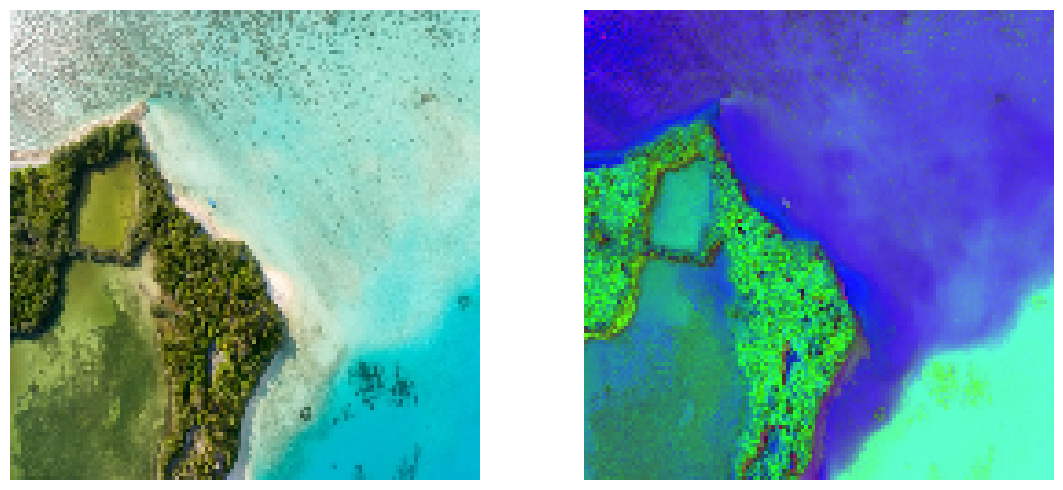

In [2]:
# Supongamos que original_image es la imagen original que tienes
original_image = cv2.imread("/content/image1.jpeg")
# Resize a un tamaño manejable para evitar cálculos extensivos
resized_image = cv2.resize(original_image, (128, 128))  # Puedes ajustar el tamaño según sea necesario

# Convertir de espacio de color BGR a HSV
img_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HSV)

_, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img_rgb), axes[0].set_axis_off()  # RGB
axes[1].imshow(img_hsv), axes[1].set_axis_off()  # HSV
plt.tight_layout()
plt.show()


In [ ]:
# Vectorize to compute kmeans
vectorized_rgb = _
vectorized_rgb = np.float32(vectorized_rgb)

vectorized_hsv = _
vectorized_hsv = np.float32(vectorized_hsv)

# Check both vector sizes
print(vectorized_rgb.shape, vectorized_hsv.shape)

In [18]:
# Vectorizar la imagen RGB
vectorized_rgb = img_rgb.reshape((128*128, 3))
vectorized_rgb = np.float32(vectorized_rgb)

# Vectorizar la imagen HSV
vectorized_hsv = img_hsv[:,:,0].reshape((-1))
vectorized_hsv = np.float32(vectorized_hsv)

# Verificar tamaños de ambos vectores
print(vectorized_rgb.shape, vectorized_hsv.shape)

(16384, 3) (16384,)


## **RGB image**

In [19]:
# Train kmeans
n = 4
kmeans = KMeans(n_clusters = n, random_state=0, max_iter=50).fit( vectorized_rgb )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
# Predict to segment regions
clustered_rgb = kmeans.predict( _ )
clustered_rgb = clustered_rgb.reshape( _ )

print(vectorized_rgb.shape, img_rgb.shape, clustered_rgb.shape)

TypeError: float() argument must be a string or a real number, not 'Figure'

In [20]:
# Predicción para segmentar regiones
clustered_rgb = kmeans.predict(vectorized_rgb)
clustered_rgb = clustered_rgb.reshape(img_rgb.shape[:2])  # Asegura que la forma coincida con las dimensiones originales de la imagen

print(vectorized_rgb.shape, img_rgb.shape, clustered_rgb.shape)


(16384, 3) (128, 128, 3) (128, 128)


TypeError: Image data of dtype object cannot be converted to float

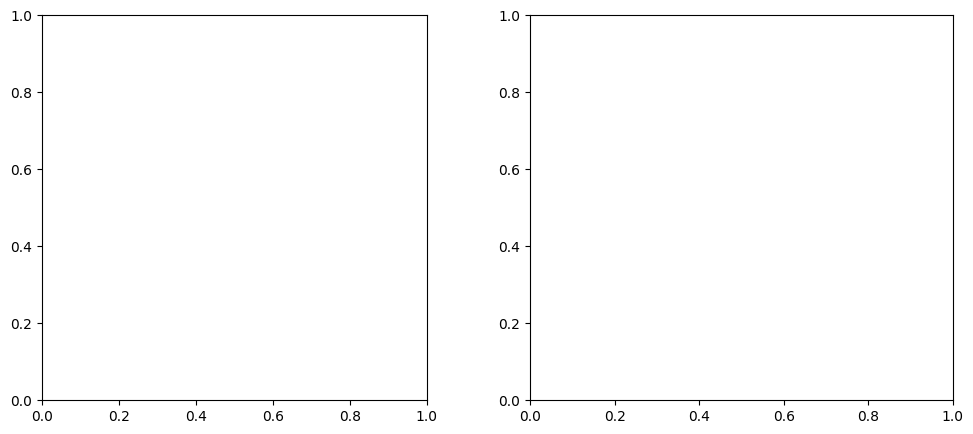

In [21]:
# Plot original and segmentation masks
_, axes = plt.subplots (1, 2, figsize = (12,5))
axes[0].imshow( _ ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( _ ), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
plt.tight_layout()

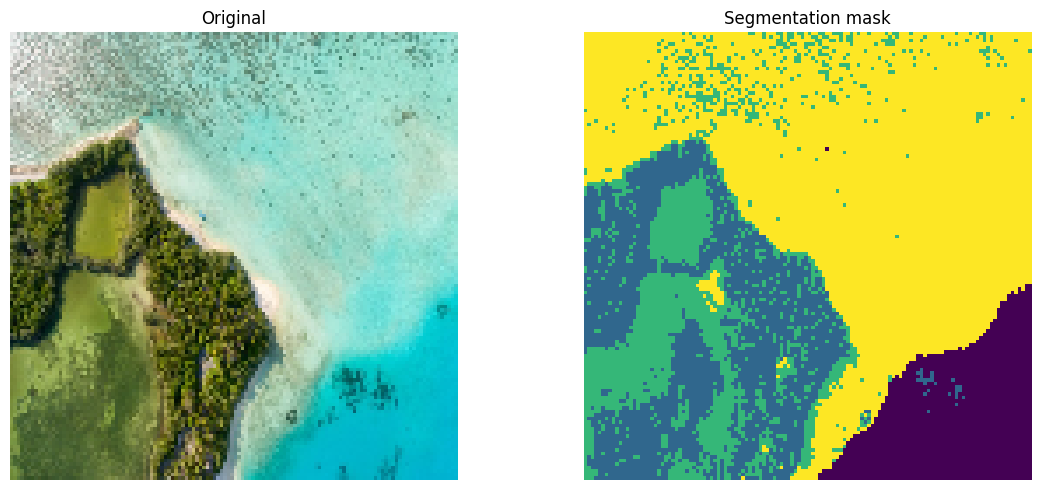

In [22]:
_, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img_rgb), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow(clustered_rgb, cmap='viridis'), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
plt.tight_layout()
plt.show()


In [10]:
# Mask only the cluster number 0 (turn the rest of pixels into black)
cluster = 0

cluster_mask = np.array ( clustered_rgb(clustered_) , dtype = np.uint8)

masked_image = np.copy(img_rgb)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask = _ )

_, axes = plt.subplots (1, 3, figsize = (12,5))
axes[0].imshow( _ ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( _ , cmap="gray"), axes[1].set_axis_off(), axes[1].set_title("Cluster mask")
axes[2].imshow( _ ), axes[2].set_axis_off(), axes[2].set_title("Segmentation")
plt.tight_layout()

NameError: name 'clustered_' is not defined

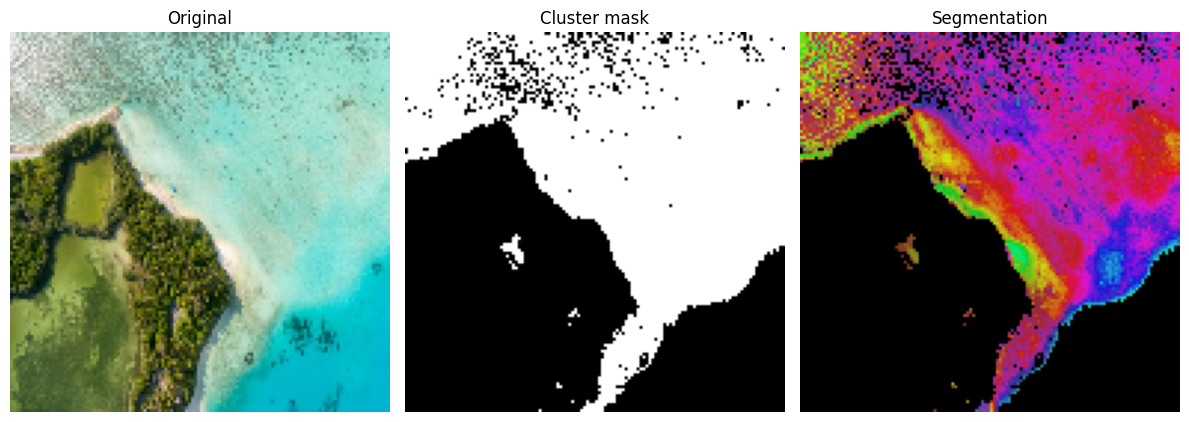

In [23]:
# Número del cluster que deseas mantener (los demás serán convertidos a negro)
cluster = 3

# Crear la máscara para el cluster específico
cluster_mask = np.array((clustered_rgb == cluster).astype(np.uint8))

# Aplicar la máscara a la imagen original
masked_image = np.copy(img_rgb)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask=cluster_mask)

_, axes = plt.subplots(1, 3, figsize=(12, 5))
axes[0].imshow(img_rgb), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow(cluster_mask, cmap="gray"), axes[1].set_axis_off(), axes[1].set_title("Cluster mask")
axes[2].imshow(cv2.cvtColor(masked_image, cv2.COLOR_HSV2RGB)), axes[2].set_axis_off(), axes[2].set_title("Segmentation")
plt.tight_layout()
plt.show()


## **HSV image**

In [25]:
# Train kmeans
n = 4
kmeans = KMeans(n_clusters = n, random_state=0).fit( vectorized_hsv.reshape(-1,1) )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
# Predict to segment regions
clustered_hsv = kmeans.predict( vectorized_hsv.reshape(-1,1) )
clustered_hsv = clustered_hsv.reshape( img_hsv.shape[:2] )

print(vectorized_hsv.shape, img_rgb.shape, clustered_hsv.shape)

(16384,) (128, 128, 3) (128, 128)


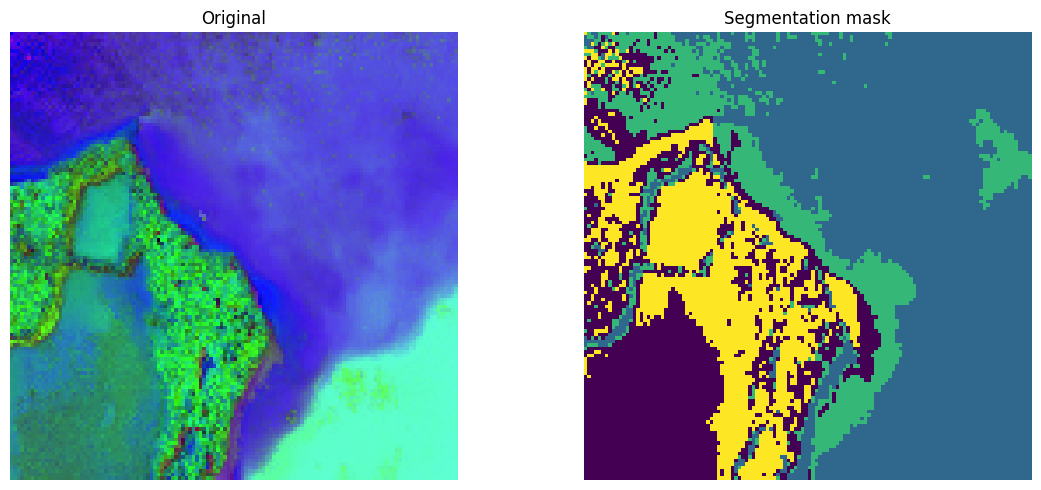

In [30]:
# Plot original and segmentation masks
_, axes = plt.subplots (1, 2, figsize = (12,5))
axes[0].imshow( img_hsv ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( clustered_hsv), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
plt.tight_layout()

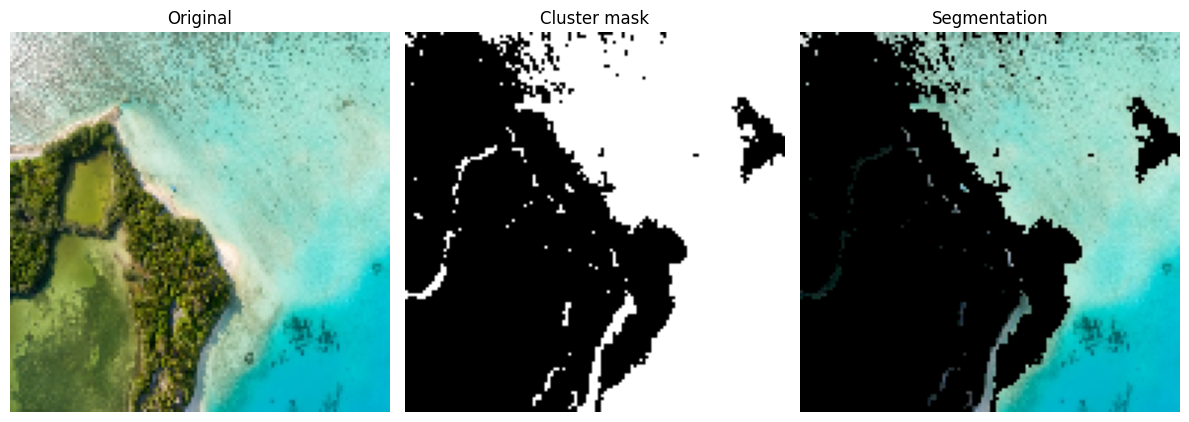

In [42]:
# Mask only the cluster number 0 (turn the rest of pixels into black)
cluster = 1

cluster_mask = np.array ( (clustered_hsv == cluster).astype(np.uint8))

masked_image = np.copy(img_rgb)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask )

_, axes = plt.subplots (1, 3, figsize = (12,5))
axes[0].imshow( img_rgb ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( cluster_mask , cmap="gray"), axes[1].set_axis_off(), axes[1].set_title("Cluster mask")
axes[2].imshow( masked_image ), axes[2].set_axis_off(), axes[2].set_title("Segmentation")
plt.tight_layout()

## **Comparison**

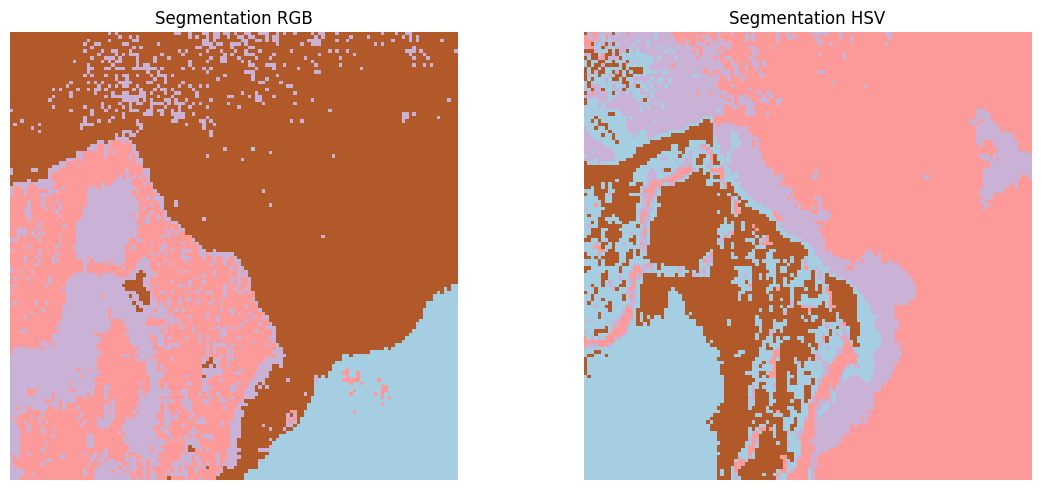

In [44]:
_, axes = plt.subplots (1, 2, figsize = (12,5))
axes[0].imshow(clustered_rgb, cmap="Paired"), axes[0].set_axis_off(), axes[0].set_title("Segmentation RGB")
axes[1].imshow(clustered_hsv, cmap="Paired"), axes[1].set_axis_off(), axes[1].set_title("Segmentation HSV")
plt.tight_layout()

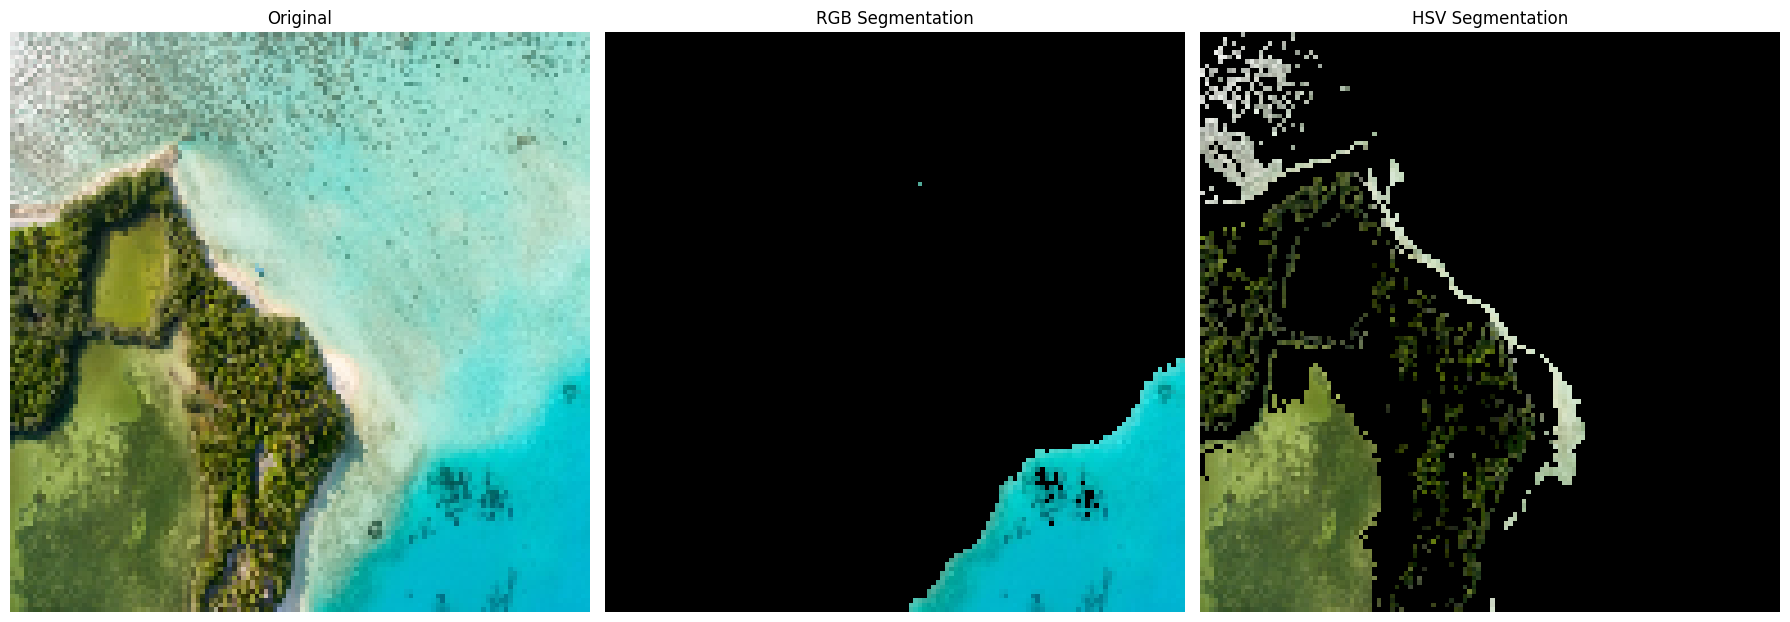

In [52]:
# Mask clusters (turn the rest of pixels into black)
cluster = 0
cluster_mask_rgb = np.array ( (clustered_rgb == cluster).astype(np.uint8))

cluster = 0
cluster_mask_hsv = np.array ( (clustered_hsv == cluster).astype(np.uint8))

masked_rgb = np.copy(img_rgb)
masked_rgb = cv2.bitwise_and(masked_rgb, masked_rgb, mask = cluster_mask_rgb )

masked_hsv = np.copy(img_rgb)
masked_hsv = cv2.bitwise_and(masked_hsv, masked_hsv, mask = cluster_mask_hsv )

_, axes = plt.subplots (1, 3, figsize = (18,8))
axes[0].imshow(img_rgb), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow(masked_rgb), axes[1].set_axis_off(), axes[1].set_title("RGB Segmentation")
axes[2].imshow(masked_hsv), axes[2].set_axis_off(), axes[2].set_title("HSV Segmentation")
plt.tight_layout()

# **Elbow and Silhouette**

Perform an analysis based on elbow and silhouette to determine the best number of clusters

# **In random images**


Repeat the segmentation with the following images:
 - [fr1.png](https://drive.google.com/file/d/18OR0DEx-rXeVBeqgbZqhzXXyOQhMyefb/view?usp=sharing)
 - [fr2.png](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [fr3.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [fr4.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
